In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

MNIST n99a

In [2]:
#loading
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

xtrain = xtrain/255.0
xtest = xtest/255.0

xtrain = xtrain.reshape(-1,28*28)
xtest = xtest.reshape(-1,28*28)

ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

In [3]:
#creating model
model = keras.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax'),
])

C:\Users\msaak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
hist = model.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_split=0.2,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8123 - loss: 0.6019 - val_accuracy: 0.9613 - val_loss: 0.1277
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9574 - loss: 0.1395 - val_accuracy: 0.9713 - val_loss: 0.0923
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9696 - loss: 0.1003 - val_accuracy: 0.9715 - val_loss: 0.0959
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9785 - loss: 0.0689 - val_accuracy: 0.9749 - val_loss: 0.0906
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9803 - loss: 0.0644 - val_accuracy: 0.9748 - val_loss: 0.0943
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9828 - loss: 0.0533 - val_accuracy: 0.9767 - val_loss: 0.0794
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9855 - loss: 0.0435 - val_accuracy: 0.9778 - val_loss: 0.0798
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9869 - loss: 0.0410 - val_accurac

In [6]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.0923


[0.07111597806215286, 0.9828000068664551]

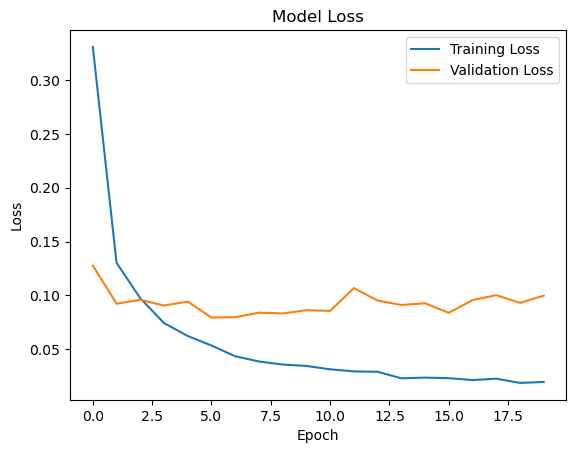

In [7]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


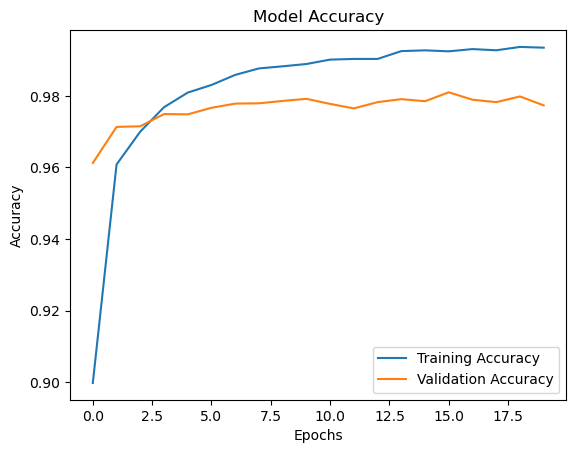

In [8]:
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


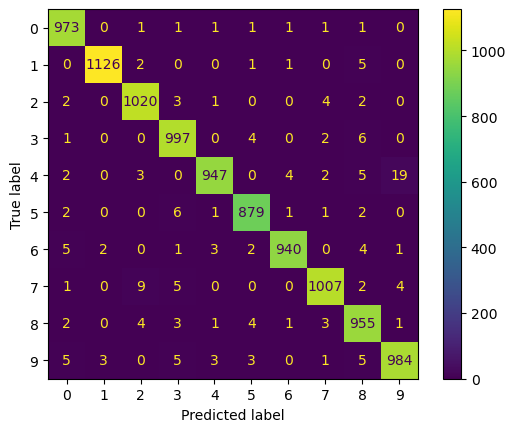

In [13]:
ypred = model.predict(xtest)
ypred_classes = np.argmax(ypred, axis=1)
ytest_classes = np.argmax(ytest, axis=1)
cc = confusion_matrix(ytest_classes, ypred_classes)
ccs = ConfusionMatrixDisplay(confusion_matrix=cc)
ccs.plot()

In [16]:
from sklearn.metrics import classification_report
dd = classification_report(ypred_classes,ytest_classes)
print(dd)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.99      1.00      0.99      1131
           2       0.99      0.98      0.99      1039
           3       0.99      0.98      0.98      1021
           4       0.96      0.99      0.98       957
           5       0.99      0.98      0.98       894
           6       0.98      0.99      0.99       948
           7       0.98      0.99      0.98      1021
           8       0.98      0.97      0.97       987
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Cifar

In [38]:
#loading
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()

xtrain = xtrain/255.0
xtest = xtest/255.0

xtrain = xtrain.reshape(-1,32*32*3)
xtest = xtest.reshape(-1,32*32*3)
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

In [39]:
#creating model
model = keras.Sequential([
    keras.layers.Dense(1024,activation='relu',input_shape=(3072,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax'),
])

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
hist = model.fit(xtrain,ytrain,batch_size=128,epochs=20,validation_split=0.2,verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.1897 - loss: 2.2774 - val_accuracy: 0.3307 - val_loss: 1.8492
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.3222 - loss: 1.8691 - val_accuracy: 0.3684 - val_loss: 1.7748
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 78ms/step - accuracy: 0.3492 - loss: 1.7923 - val_accuracy: 0.3950 - val_loss: 1.6974
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.3703 - loss: 1.7470 - val_accuracy: 0.3988 - val_loss: 1.6943
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.3831 - loss: 1.7176 - val_accuracy: 0.4124 - val_loss: 1.6404
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.3923 - loss: 1.6846 - val_accuracy: 0.4094 - val_loss: 1.6597
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.4040 - loss: 1.6535 - val_accuracy: 0.4230 - val_loss: 1.6267
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.4107 - loss: 1.6396 - 

In [42]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4809 - loss: 1.4793


[1.4873908758163452, 0.4715000092983246]

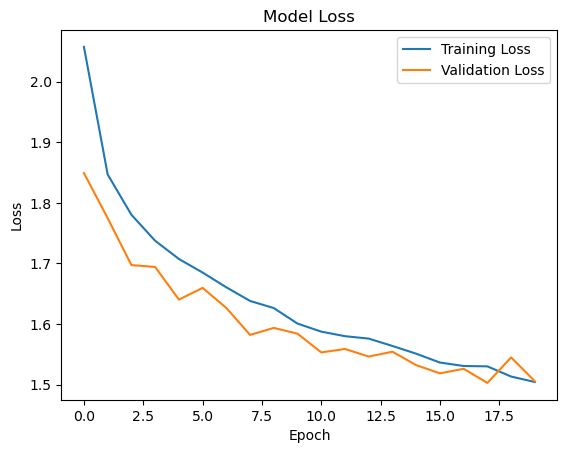

In [43]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


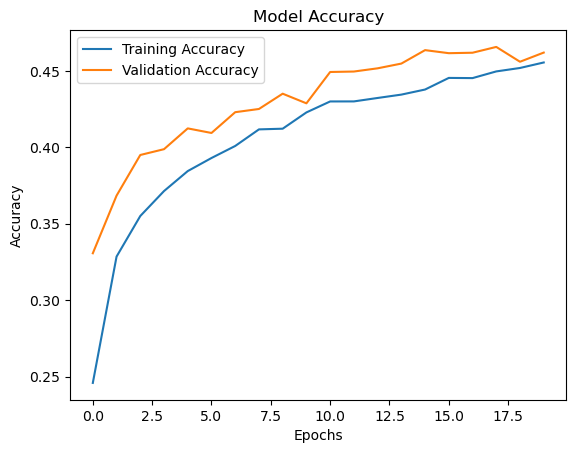

In [44]:
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


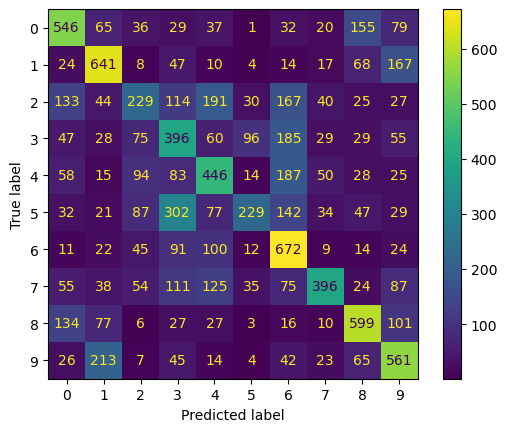

In [46]:
ypred = model.predict(xtest)
ypred_classes = np.argmax(ypred, axis=1)
ytest_classes = np.argmax(ytest, axis=1)
cc = confusion_matrix(ytest_classes, ypred_classes)
ccs = ConfusionMatrixDisplay(confusion_matrix=cc)
ccs.plot()

In [47]:
from sklearn.metrics import classification_report
dd = classification_report(ypred_classes,ytest_classes)
print(dd)

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1066
           1       0.64      0.55      0.59      1164
           2       0.23      0.36      0.28       641
           3       0.40      0.32      0.35      1245
           4       0.45      0.41      0.43      1087
           5       0.23      0.54      0.32       428
           6       0.67      0.44      0.53      1532
           7       0.40      0.63      0.49       628
           8       0.60      0.57      0.58      1054
           9       0.56      0.49      0.52      1155

    accuracy                           0.47     10000
   macro avg       0.47      0.48      0.46     10000
weighted avg       0.51      0.47      0.48     10000

